# Mapas Auto-organizaveis
*Identificando* fraudes em clientes de cartão de crédito

In [1]:
#importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importando nossos dados para o dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
#Reealizando o Featuring Scale
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [4]:
#importando a biblioteca de SOM
from minisom import MiniSom

In [5]:
#criando o objeto SOM
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)


In [6]:
#inicializamos os pesos
som.random_weights_init(X)

In [7]:
#treinando
som.train_random(data = X, num_iteration = 100)

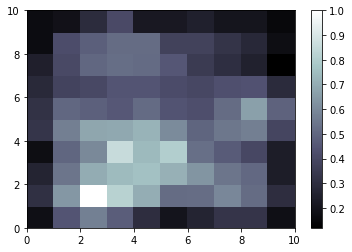

In [8]:
#visualizamos os resultados
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

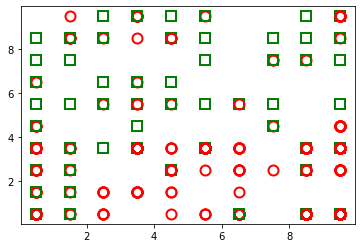

In [9]:
for i, x in enumerate(X):
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgewidth = 2) 
show()
